In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score




data = pd.read_excel("NS (2) (3).xlsx")



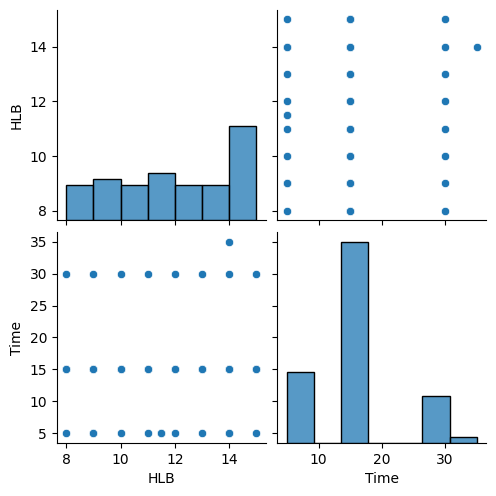

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing your dataset
# Replace 'data' with the name of your DataFrame

# List of numerical columns
numerical_columns = ['HLB','Time']

# Create a pairplot
sns.pairplot(data[numerical_columns])
plt.show()

In [4]:
# Convert column 'B' to float
data['Particle Size'] = data['Particle Size'].astype(float)

In [5]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index(['O:S'], dtype='object')


In [6]:
import pandas as pd

# Perform one-hot encoding on the 'O:S' column
one_hot = pd.get_dummies(data['O:S'])

# Join the one-hot encoded columns with the original DataFrame
df_encoded = data.join(one_hot)

df_encoded = df_encoded.drop('O:S', axis=1)

df_encoded.head()

,HLB,Time,Particle Size,PDI,1:1,1:2,2:1,3:1,4:1
0,8.0,15,43.3,0.395,False,False,False,False,True
1,8.0,15,80.3,0.363,False,False,True,False,False
2,8.0,15,110.4,0.364,True,False,False,False,False
3,8.0,15,169.2,0.354,False,True,False,False,False
4,8.0,5,109.8,0.362,True,False,False,False,False


In [7]:
X = df_encoded.drop(['Particle Size', 'PDI'],axis = 1)
Y = df_encoded['PDI']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestRegressor(n_estimators=30, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)



Mean Squared Error: 0.0004266175757575744
R² Score: 0.8030464918706637


In [10]:
# for predicting new values

In [15]:
import pandas as pd

# List of columns
columns = ['HLB', 'Time', '1:1', '1:2', '2:1', '3:1', '4:1']


df = pd.DataFrame(columns=columns)

df["HLB"] = [11,14]
df["Time"] = [15,15]
df["1:1"] = [True, True]
df["1:2"] = [False, False]
df["2:1"] = [False, False]
df["3:1"] = [False, False]
df["4:1"] = [False, False]

df

,HLB,Time,1:1,1:2,2:1,3:1,4:1
0,11,15,True,False,False,False,False
1,14,15,True,False,False,False,False


In [16]:
k = model.predict(df)

In [17]:
final_df = df
final_df['PDI'] = k

In [18]:
final_df

,HLB,Time,1:1,1:2,2:1,3:1,4:1,PDI
0,11,15,True,False,False,False,False,0.303467
1,14,15,True,False,False,False,False,0.215733
